# Search Agent demo

This notebook shows the basic `SearchAgent` functionality. The agent can move between locations that are connected in the graph, and observes whether the object of their interest is located there. The preference is to find (see) the object.

In [1]:
%load_ext autoreload
%autoreload 2

import sys

if ".." not in sys.path:
    sys.path.append("..")

import numpy as np
np.random.seed(1)

## Environment

We start by creating the environment by specifying the graph, the objects and the agents. 

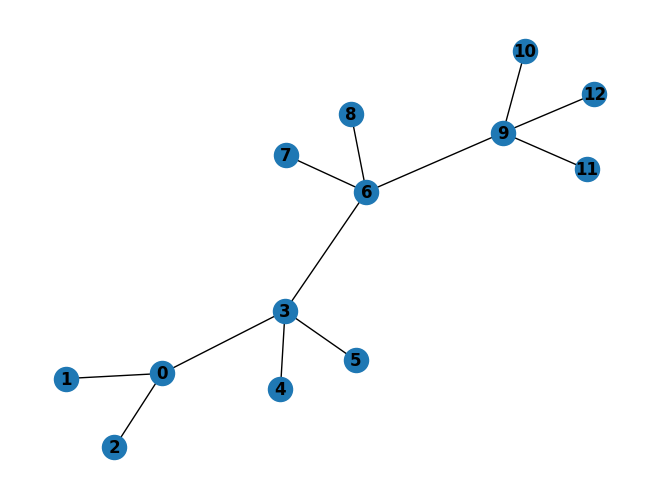

In [2]:
import util
import networkx as nx

graph, metadata = util.generate_connected_clusters(3, 4)
nx.draw(graph, with_labels=True, font_weight="bold")

In [3]:
from envs import GraphEnv

agent_config = {
        "Agent 1": 0,
        "Agent 2": 10,
    }
# define objects and their true locations
object_config = {"Reward": 6}

# create environment
env = GraphEnv(graph, agent_config, object_config)

## Agents

Now we create a `SearchAgent` for every agent in the configuration. Each agent is interested in (only) the first object.

In [4]:
from agents import SearchAgent

agents = [SearchAgent(a, env, objects_of_interest=[0]) for a in agent_config.keys()]

## Simulation

To run a simulation, call `tick(agents, env)` for each agent for a number of timesteps. 

This will infer the next action for each agent, execute it in the environment and get an observation back, and calculate a new posterior for the agent given this observation. It will return a dict with all metadata that we collect in `result` to visualize the results later.

In [5]:
from experiment import tick

result = {a: [] for a in agent_config.keys()}

# simulate T timesteps
T = 10
for t in range(T):
    info = tick(agents, env)
    for agent, info in info.items():
        result[agent].append(info)

Agent 2 moved to location 10
Agent 1 moved to location 2
Agent 2 moved to location 9
Agent 1 moved to location 0
Agent 2 moved to location 6 and observed object
Agent 1 moved to location 3
Agent 1 moved to location 6 and observed object
Agent 2 moved to location 6 and observed object
Agent 2 moved to location 6 and observed object
Agent 1 moved to location 6 and observed object
Agent 1 moved to location 6 and observed object
Agent 2 moved to location 6 and observed object
Agent 1 moved to location 6 and observed object
Agent 2 moved to location 6 and observed object
Agent 1 moved to location 6 and observed object
Agent 2 moved to location 6 and observed object
Agent 1 moved to location 6 and observed object
Agent 2 moved to location 6 and observed object
Agent 1 moved to location 6 and observed object
Agent 2 moved to location 6 and observed object


# Results

We can now plot the results. First we show the agent's beliefs on the object location over time. Each agent starts with a uniform distribution over the object location. The dots show the location visited by the agent at that timestep. Uncertainty gets resolved as locations are visited, and ultimately both agents find the rewarding object location and stay there.

Next, we plot the variational free energy over time. The VFE spikes at the timestep that the agent actually finds the object.

Finally, we also plot the expected free energy over time of the best policy. Once the object is found, the EFE drops as from then on the agent has a way to maximize utility.

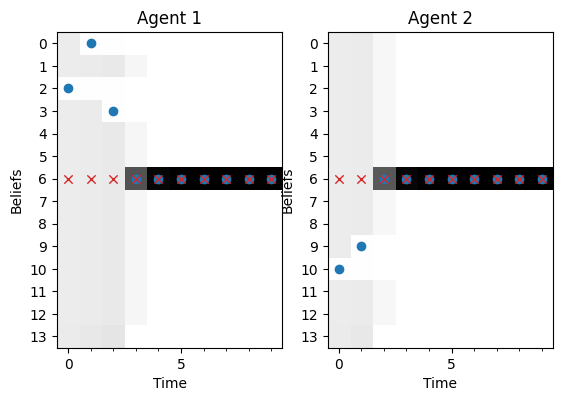

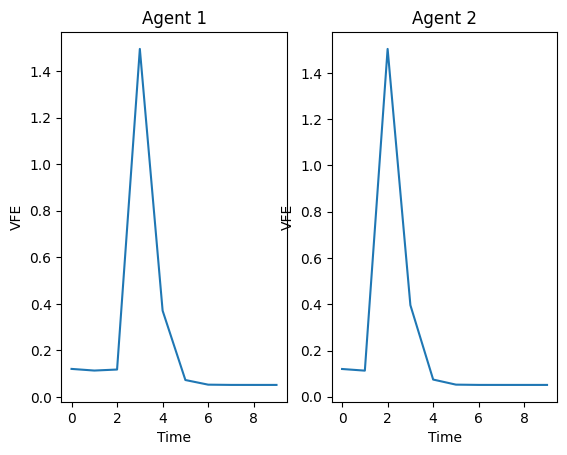

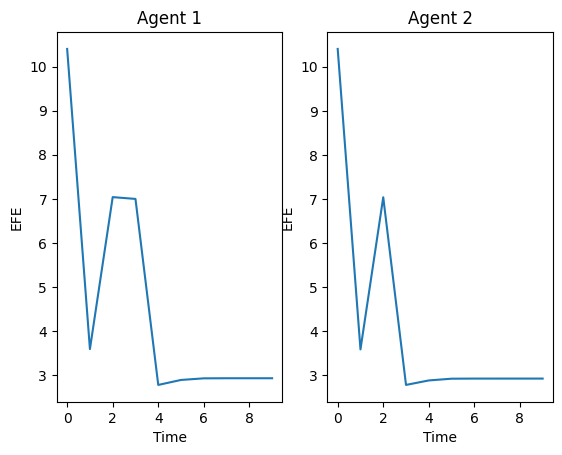

In [6]:
from visualize import *

plot_beliefs(result)
plot_vfe(result)
plot_efe(result)